In this notebook we use Logistic Regression (LR) to learn a model that can distinguish between the spam data (food reviews) and legitimate data (Austen). 

Logistic regression is a standard statistical technique used to model a binary variable. In our case we are predicting whether a given feature vector corresponds to a document which is 'spam' or 'not spam' (i.e. legitimate). 

We begin by loading in the feature vectors which we generated in either notebook [02-feature-engineering](02-feature-engineering.ipynb) or notebook [02a-feature-engineering](02a-feature-engineering.ipynb). 

In [1]:
import pandas as pd

#tf-idf feature vector
#generated in notebook 02-feature-engineering.ipynb
#feats = pd.read_parquet("data/tfidf_features.parquet")

#simple summaries feature vector
#generated in notebook 02a-feature-engineering.ipynb
feats = pd.read_parquet("data/simplesummaries_features.parquet") 

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
feats.sample(10)

,index,label,num_punct,num_words,av_wl,max_wl,min_wl,10_quantile,90_quantile,upper_case,stop_words
15919,15919,legitimate,3.0,39.0,3.794872,9.0,1.0,2.0,6.0,7.0,21.0
7186,7186,legitimate,7.0,46.0,3.717391,10.0,1.0,2.0,7.0,8.0,28.0
2643,2643,legitimate,10.0,86.0,4.686047,12.0,1.0,2.0,9.0,8.0,48.0
30041,10041,spam,12.0,74.0,4.554054,12.0,1.0,2.0,8.0,9.0,34.0
38615,18615,spam,8.0,48.0,4.166667,9.0,1.0,1.7,7.0,12.0,17.0
35960,15960,spam,9.0,102.0,4.284314,12.0,1.0,2.0,7.9,11.0,55.0
4205,4205,legitimate,17.0,77.0,4.480519,14.0,1.0,2.0,9.0,11.0,35.0
7726,7726,legitimate,14.0,61.0,5.098361,13.0,2.0,2.0,9.0,7.0,30.0
12085,12085,legitimate,18.0,111.0,4.522523,13.0,1.0,2.0,8.0,9.0,57.0
36915,16915,spam,16.0,72.0,4.222222,10.0,1.0,2.0,7.0,11.0,38.0


The first 2 columns of the 'feats' matrix are the index, and label. The remaining columns are the feature vectors. 

We begin by splitting the data into 2 sets: 

* train - a set of feature vectors which will be used to train the model
* test - a set of feature vectors which will be used to evaluate the model we trained

In [3]:
from sklearn import model_selection
train, test = model_selection.train_test_split(feats)

In [4]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 4000)

In [19]:
num_feats = train.shape[1] -2 #train.shape[1] holds the number of features +2 

In [20]:
import time

start = time.time()
model.fit(X=train.iloc[:,2:num_feats], y=train["label"])
end = time.time()
print(end - start)


0.28913116455078125


With the model trained we can use it to make predictions. We apply the model to the 'test' set, then compare the predicted classification of spam or legitimate to the truth.  

In [21]:
predictions = model.predict(test.iloc[:,2:num_feats])

In [22]:
predictions

array(['spam', 'spam', 'spam', ..., 'legitimate', 'legitimate',
       'legitimate'], dtype=object)

We use a binary confusion matrix to visualise the accuracy of the model. 

In [23]:
from mlworkflows import plot

In [24]:
df, chart = plot.binary_confusion_matrix(test["label"], predictions)

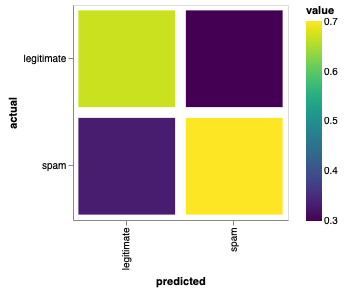

In [25]:
chart

We can look at the raw numbers, and proportions of correctly and incorrectly classified items: 

In [26]:
df

,actual,predicted,raw_count,value
0,legitimate,legitimate,3324,0.668275
1,spam,legitimate,1650,0.331725
2,legitimate,spam,1507,0.299841
3,spam,spam,3519,0.700159


We can also look at the precision, recall and f1-score for the model. 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test.label.values, predictions))

              precision    recall  f1-score   support

  legitimate       0.69      0.67      0.68      4974
        spam       0.68      0.70      0.69      5026

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

